# Essentiel

In [ ]:
clean_notebook.ipynb

# Pré-requis

In [22]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import json
from tqdm import tqdm_notebook
import tqdm

# Data

In [2]:
matrice_sbert = pd.read_csv('scores_matrix/matrix_sbert.csv')
matrice_sbert = matrice_sbert.drop('Unnamed: 0',axis=1)
matrice_syntax_postag = pd.read_csv('scores_matrix/matrix_syntax_postag.csv')
matrice_syntax_postag = matrice_syntax_postag.drop('Unnamed: 0',axis=1)
matrice_syntax_tree = pd.read_csv('scores_matrix/matrix_syntax_tree.csv')
matrice_syntax_tree = matrice_syntax_tree.drop('Unnamed: 0',axis=1)

In [3]:
with open("predictions/dev-labels.lst") as f:
    lineList_dev = f.readlines()
true_labels = [int(element.replace('\n','')) for element in lineList_dev]

with open("predictions/predictions_test.lst") as f:
    lineList_dev = f.readlines()
test_labels = [int(element.replace('\n', '')) for element in lineList_dev]

with open("predictions/predictions_test.lst") as f:
    lineList_dev = f.readlines()
test_labels_proba = [int(element.replace('\n', '')) for element in lineList_dev]

pred_probas = pd.read_csv('predictions/predictions_test_proba.csv',sep=';',header=None)

In [226]:
with open('data/xl/train_xl.jsonl', 'r') as f:
  a = list(f)

data_xl =[]
for element in a:
  data_xl.append(json.loads(element))

data_xl = pd.DataFrame(data_xl)

In [227]:
with open('data/test/test.jsonl', 'r') as f:
  a = list(f)

data_test =[]
for element in a:
  data_test.append(json.loads(element))

data_test = pd.DataFrame(data_test)

# Preprocessing

In [5]:
# Fonction pour pred_probas
def change_form(x):
    return [float(i) for i in x[2:-2].split()]

In [6]:
# Preprocessing pred_probas

pred_probas[1] = pred_probas[1].apply(change_form)
#pred_probas

In [290]:
# Fonctions pour df_labels

def for_df(x,y):
    if x==y:
        return 1
    else:
        return 0

def inv_softmax(probas,rp):
    return np.exp(rp)/(np.exp(probas[0])+np.exp(probas[1]))

def proba_for_good(true,list_prob):
    return list_prob[true-1]

def proba_for_wrong(true,list_proba):
    return list_proba[2-true]

In [8]:
# Construction de df_labels

df_labels = pd.DataFrame(np.transpose([true_labels,test_labels]),
                         columns=['true_labels','test_labels'])
df_labels['is_identical'] = df_labels.apply(lambda x: for_df(x.test_labels, x.true_labels), axis=1)
df_labels['max_sbert'] = list(matrice_sbert.max())
df_labels['mean_sbert'] = list(matrice_sbert.mean())
df_labels['max_postag'] = list(matrice_syntax_postag.max())
df_labels['mean_postag'] = list(matrice_syntax_postag.mean())
df_labels['max_tree'] = list(matrice_syntax_tree.max())
df_labels['mean_tree'] = list(matrice_syntax_tree.mean())
df_labels['both_probas'] = list(pred_probas[1])
df_labels['right_proba'] = df_labels.apply(lambda x: proba_for_good(x.true_labels, x.both_probas), axis=1)
df_labels['proba'] = df_labels.apply(lambda x: inv_softmax(x.both_probas,x.right_proba),axis=1)

In [291]:
df_labels['wrong_proba'] = df_labels.apply(lambda x: proba_for_wrong(x.true_labels, x.both_probas), axis=1)

In [9]:
df_labels.head()

,true_labels,test_labels,is_identical,max_sbert,mean_sbert,max_postag,mean_postag,max_tree,mean_tree,both_probas,right_proba,proba
0,2,1,0,0.886177,0.452219,0.230769,0.011784,0.777778,0.139553,"[5.0213194, -5.833286]",-5.833286,0.000019
1,1,1,1,0.871552,0.466545,0.230769,0.015038,0.777778,0.139553,"[2.3608248, -6.932063]",2.360825,0.999908
2,2,2,1,0.818636,0.507991,0.149051,0.010764,0.461538,0.117724,"[9.429515, 15.50737]",15.507370,0.997712
3,1,1,1,0.904500,0.441542,0.286432,0.029332,0.652174,0.150080,"[15.58206, -14.36882]",15.582060,1.000000
4,1,1,1,0.853596,0.429754,0.082353,0.007494,0.541667,0.151310,"[12.558033, -11.74112]",12.558033,1.000000


# Métriques séléctionnées :

- Distance cosinus appliquée à SBERT (métrique sémantique):
$$ \forall x,y \in \mathbb{R}^{758}_{SBERT emebdding}, dist = cos(x,y)$$
- Distance de jaccard appliquée à la représentation des phrases par des pos_tag
$$ \forall E_{1},E_{2} \in Combinaisons(postag), dist = jaccard(E_{1},E_{2}) $$
- DIstance de jaccard appliquée aux branches de la représentation des phrases par des arbres de dépendances
$$ \forall E_{1},E_{2} \in Branches_{dependency trees}, dist = jaccard(E_{1},E_{2}) $$

# Justification du choix des métriques

In [ ]:
for matrice,name in zip([matrice_sbert,matrice_syntax_tree,matrice_syntax_postag],
                   ['sbert','tree','postag']):



c:\users\marti\work\lattice-internship\venv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\users\marti\work\lattice-internship\venv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\users\marti\work\lattice-internship\venv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level func

decile:   0%|          | 0/1267 [00:00<?, ?it/s]

c:\users\marti\work\lattice-internship\venv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\marti\AppData\Local\Temp\ipykernel_11604\14637119.py:11: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  sns.distplot([matrice.sort_values(column,ascending=False)[column].iloc[int(len(matrice)/100)] for column in tqdm_notebook(list(matrice.columns),desc='centile')],label = '100th centile')


centile:   0%|          | 0/1267 [00:00<?, ?it/s]

c:\users\marti\work\lattice-internship\venv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\users\marti\work\lattice-internship\venv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\users\marti\work\lattice-internship\venv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level func

decile:   0%|          | 0/1267 [00:00<?, ?it/s]

c:\users\marti\work\lattice-internship\venv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\marti\AppData\Local\Temp\ipykernel_11604\14637119.py:11: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  sns.distplot([matrice.sort_values(column,ascending=False)[column].iloc[int(len(matrice)/100)] for column in tqdm_notebook(list(matrice.columns),desc='centile')],label = '100th centile')


centile:   0%|          | 0/1267 [00:00<?, ?it/s]

c:\users\marti\work\lattice-internship\venv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\users\marti\work\lattice-internship\venv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\users\marti\work\lattice-internship\venv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level func

decile:   0%|          | 0/1267 [00:00<?, ?it/s]

c:\users\marti\work\lattice-internship\venv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\marti\AppData\Local\Temp\ipykernel_11604\14637119.py:11: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  sns.distplot([matrice.sort_values(column,ascending=False)[column].iloc[int(len(matrice)/100)] for column in tqdm_notebook(list(matrice.columns),desc='centile')],label = '100th centile')


centile:   0%|          | 0/1267 [00:00<?, ?it/s]

c:\users\marti\work\lattice-internship\venv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


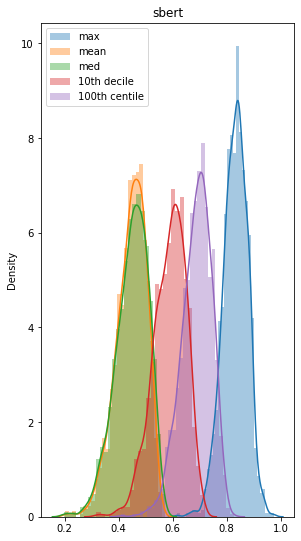

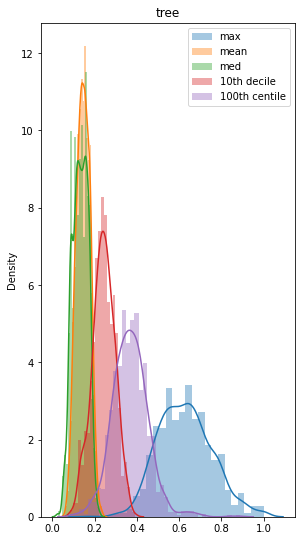

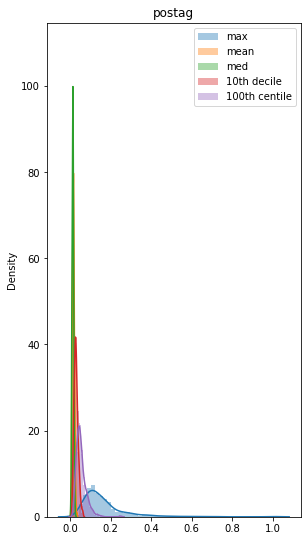

In [50]:
for matrice,i,title in zip([matrice_sbert,matrice_syntax_tree,matrice_syntax_postag],
                           range(1,4),['sbert','tree','postag']):
    plt.figure(figsize=(20,10))
    plt.subplot(2,2,i)
    plt.title(title)
    sns.distplot(matrice.max(),label='max')
    sns.distplot(matrice.mean(),label='mean')
    sns.distplot(matrice.median(),label='med')
    sns.distplot([matrice.sort_values(column,ascending=False)[column].iloc[int(len(matrice)/10)] for column in tqdm_notebook(list(matrice.columns),desc='decile')],label = '10th decile')
    sns.distplot([matrice.sort_values(column,ascending=False)[column].iloc[int(len(matrice)/100)] for column in tqdm_notebook(list(matrice.columns),desc='centile')],label = '100th centile')
    plt.legend()

In [10]:
matrice_sbert

,0,1,2,3,4,5,6,7,8,9,...,1257,1258,1259,1260,1261,1262,1263,1264,1265,1266
0,0.316807,0.373840,0.530221,0.656162,0.530080,0.524673,0.299850,0.529248,0.474584,0.667774,...,0.267775,0.418164,0.362657,0.236048,0.281474,0.523898,0.533571,0.601892,0.563537,0.299001
1,0.384520,0.359550,0.435553,0.560183,0.431680,0.476730,0.396988,0.466997,0.427022,0.515475,...,0.214115,0.225793,0.434328,0.325097,0.360334,0.448217,0.445628,0.721007,0.514354,0.320239
2,0.338426,0.336966,0.470748,0.433693,0.671608,0.408010,0.365251,0.523279,0.419795,0.649816,...,0.303917,0.521256,0.283567,0.401653,0.508999,0.363738,0.441328,0.328512,0.620914,0.205880
3,0.390865,0.445105,0.378808,0.537232,0.693117,0.315308,0.398397,0.509811,0.474354,0.629071,...,0.453759,0.476446,0.353816,0.365195,0.480380,0.457613,0.498605,0.320132,0.472581,0.222268
4,0.370989,0.459286,0.536853,0.442257,0.653511,0.368366,0.358883,0.539318,0.402457,0.520190,...,0.523693,0.622484,0.259316,0.189285,0.285034,0.477385,0.421080,0.193486,0.478981,0.348717
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40393,0.417160,0.417719,0.447479,0.434969,0.343598,0.403787,0.382739,0.538701,0.382461,0.515128,...,0.211823,0.361341,0.395037,0.325583,0.266692,0.495854,0.347716,0.488034,0.542663,0.303966
40394,0.346285,0.430337,0.439792,0.479797,0.613833,0.418358,0.315240,0.490273,0.544070,0.657689,...,0.521003,0.448324,0.360996,0.391185,0.422376,0.544460,0.524770,0.308476,0.550222,0.156705
40395,0.299576,0.424343,0.345456,0.430504,0.587999,0.441077,0.304973,0.478553,0.562934,0.603723,...,0.550680,0.334639,0.384586,0.375047,0.404286,0.566545,0.563403,0.302202,0.468538,0.131252
40396,0.585621,0.488470,0.494350,0.299411,0.256455,0.359927,0.706123,0.573355,0.431401,0.330731,...,0.358994,0.474422,0.470196,0.357181,0.368545,0.363726,0.215458,0.481326,0.418570,0.607034


In [24]:
step = 0.1
dico_01 = {}
decoupage = [round(i*step,ndigits=2) for i in range(int(1/step)+1)]
for metric in tqdm_notebook(['max_sbert','max_postag','max_tree'],desc='metric'):
    dico = {}
    for i in tqdm.notebook.tqdm(range(len(decoupage)-1),desc='decoupage'):
        temporaire = df_labels[df_labels[metric]>=decoupage[i]][df_labels[metric]<=decoupage[i+1]]
        dico[decoupage[i]] = pd.DataFrame(np.transpose([list(temporaire.index),temporaire[metric],temporaire['proba'],temporaire['is_identical']]),columns=['index',metric,'proba','is_identical'])
    dico_01[metric] = dico

C:\Users\marti\AppData\Local\Temp\ipykernel_9596\2321188275.py:4: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for metric in tqdm_notebook(['max_sbert','max_postag','max_tree'],desc='metric'):


metric:   0%|          | 0/3 [00:00<?, ?it/s]

decoupage:   0%|          | 0/10 [00:00<?, ?it/s]

C:\Users\marti\AppData\Local\Temp\ipykernel_9596\2321188275.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  temporaire = df_labels[df_labels[metric]>=decoupage[i]][df_labels[metric]<=decoupage[i+1]]
C:\Users\marti\AppData\Local\Temp\ipykernel_9596\2321188275.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  temporaire = df_labels[df_labels[metric]>=decoupage[i]][df_labels[metric]<=decoupage[i+1]]
C:\Users\marti\AppData\Local\Temp\ipykernel_9596\2321188275.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  temporaire = df_labels[df_labels[metric]>=decoupage[i]][df_labels[metric]<=decoupage[i+1]]


decoupage:   0%|          | 0/10 [00:00<?, ?it/s]

C:\Users\marti\AppData\Local\Temp\ipykernel_9596\2321188275.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  temporaire = df_labels[df_labels[metric]>=decoupage[i]][df_labels[metric]<=decoupage[i+1]]
C:\Users\marti\AppData\Local\Temp\ipykernel_9596\2321188275.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  temporaire = df_labels[df_labels[metric]>=decoupage[i]][df_labels[metric]<=decoupage[i+1]]
C:\Users\marti\AppData\Local\Temp\ipykernel_9596\2321188275.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  temporaire = df_labels[df_labels[metric]>=decoupage[i]][df_labels[metric]<=decoupage[i+1]]
C:\Users\marti\AppData\Local\Temp\ipykernel_9596\2321188275.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  temporaire = df_labels[df_labels[metric]>=decoupage[i]][df_labels[metric]<=decoupage[i+1]]
C:\Users\marti\AppData\Local\Temp\ipykernel_9596\2321188275.

decoupage:   0%|          | 0/10 [00:00<?, ?it/s]

C:\Users\marti\AppData\Local\Temp\ipykernel_9596\2321188275.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  temporaire = df_labels[df_labels[metric]>=decoupage[i]][df_labels[metric]<=decoupage[i+1]]
C:\Users\marti\AppData\Local\Temp\ipykernel_9596\2321188275.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  temporaire = df_labels[df_labels[metric]>=decoupage[i]][df_labels[metric]<=decoupage[i+1]]
C:\Users\marti\AppData\Local\Temp\ipykernel_9596\2321188275.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  temporaire = df_labels[df_labels[metric]>=decoupage[i]][df_labels[metric]<=decoupage[i+1]]
C:\Users\marti\AppData\Local\Temp\ipykernel_9596\2321188275.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  temporaire = df_labels[df_labels[metric]>=decoupage[i]][df_labels[metric]<=decoupage[i+1]]
C:\Users\marti\AppData\Local\Temp\ipykernel_9596\2321188275.

In [275]:
step = 0.05
dico_005 = {}
decoupage = [round(i*step,ndigits=2) for i in range(int(1/step)+1)]
for metric in tqdm.notebook.tqdm(['max_sbert','max_postag','max_tree'],desc='metric'):
    dico = {}
    for i in tqdm.notebook.tqdm(range(len(decoupage)-1),desc='decoupage'):
        temporaire = df_labels[df_labels[metric]>=decoupage[i]][df_labels[metric]<=decoupage[i+1]]
        dico[decoupage[i]] = pd.DataFrame(np.transpose([list(temporaire.index),temporaire[metric],temporaire['proba'],temporaire['is_identical'],temporaire['right_proba']]),columns=['index',metric,'proba','is_identical','right_proba'])
    dico_005[metric] = dico

metric:   0%|          | 0/3 [00:00<?, ?it/s]

decoupage:   0%|          | 0/20 [00:00<?, ?it/s]

C:\Users\marti\AppData\Local\Temp\ipykernel_9596\1019336110.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  temporaire = df_labels[df_labels[metric]>=decoupage[i]][df_labels[metric]<=decoupage[i+1]]
C:\Users\marti\AppData\Local\Temp\ipykernel_9596\1019336110.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  temporaire = df_labels[df_labels[metric]>=decoupage[i]][df_labels[metric]<=decoupage[i+1]]
C:\Users\marti\AppData\Local\Temp\ipykernel_9596\1019336110.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  temporaire = df_labels[df_labels[metric]>=decoupage[i]][df_labels[metric]<=decoupage[i+1]]
C:\Users\marti\AppData\Local\Temp\ipykernel_9596\1019336110.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  temporaire = df_labels[df_labels[metric]>=decoupage[i]][df_labels[metric]<=decoupage[i+1]]
C:\Users\marti\AppData\Local\Temp\ipykernel_9596\1019336110.

decoupage:   0%|          | 0/20 [00:00<?, ?it/s]

C:\Users\marti\AppData\Local\Temp\ipykernel_9596\1019336110.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  temporaire = df_labels[df_labels[metric]>=decoupage[i]][df_labels[metric]<=decoupage[i+1]]
C:\Users\marti\AppData\Local\Temp\ipykernel_9596\1019336110.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  temporaire = df_labels[df_labels[metric]>=decoupage[i]][df_labels[metric]<=decoupage[i+1]]
C:\Users\marti\AppData\Local\Temp\ipykernel_9596\1019336110.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  temporaire = df_labels[df_labels[metric]>=decoupage[i]][df_labels[metric]<=decoupage[i+1]]
C:\Users\marti\AppData\Local\Temp\ipykernel_9596\1019336110.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  temporaire = df_labels[df_labels[metric]>=decoupage[i]][df_labels[metric]<=decoupage[i+1]]
C:\Users\marti\AppData\Local\Temp\ipykernel_9596\1019336110.

decoupage:   0%|          | 0/20 [00:00<?, ?it/s]

C:\Users\marti\AppData\Local\Temp\ipykernel_9596\1019336110.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  temporaire = df_labels[df_labels[metric]>=decoupage[i]][df_labels[metric]<=decoupage[i+1]]
C:\Users\marti\AppData\Local\Temp\ipykernel_9596\1019336110.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  temporaire = df_labels[df_labels[metric]>=decoupage[i]][df_labels[metric]<=decoupage[i+1]]
C:\Users\marti\AppData\Local\Temp\ipykernel_9596\1019336110.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  temporaire = df_labels[df_labels[metric]>=decoupage[i]][df_labels[metric]<=decoupage[i+1]]
C:\Users\marti\AppData\Local\Temp\ipykernel_9596\1019336110.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  temporaire = df_labels[df_labels[metric]>=decoupage[i]][df_labels[metric]<=decoupage[i+1]]
C:\Users\marti\AppData\Local\Temp\ipykernel_9596\1019336110.

<Figure size 720x360 with 0 Axes>

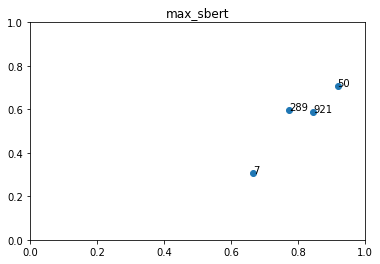

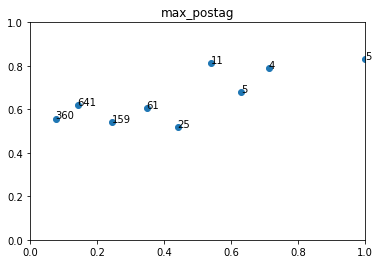

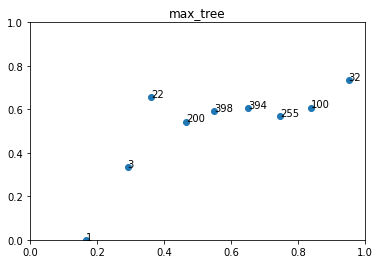

In [26]:
plt.figure(figsize=(10,5))
for metric,i in zip(['max_sbert','max_postag','max_tree'],range(1,4)):
    fig,ax=plt.subplots()
    plt.title(metric)
    plt.scatter([dico_01[metric][i].mean()[metric] for i in dico_01[metric]],[dico_01[metric][i].mean()['proba'] for i in dico_01[metric]])
    plt.xlim([0,1])
    plt.ylim([0,1])
    occ_per_range = [len(dico_01[metric][i]) for i in dico_01[metric]]
    for i, txt in enumerate(occ_per_range):
        ax.annotate(txt, ([dico_01[metric][i].mean()[metric] for i in dico_01[metric]][i], [dico_01[metric][i].mean()['proba'] for i in dico_01[metric]][i]))
    plt.show()

<Figure size 720x360 with 0 Axes>

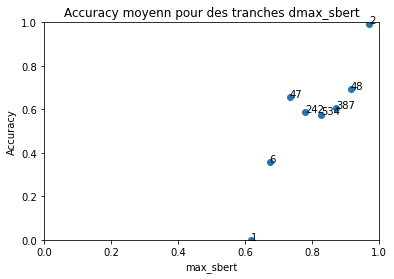

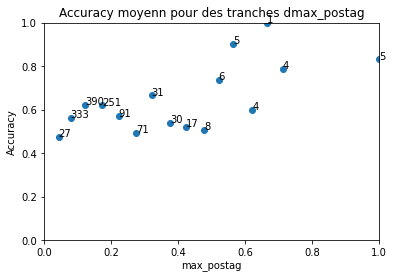

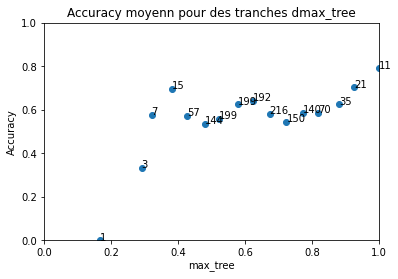

In [27]:
plt.figure(figsize=(10,5))
for metric,i in zip(['max_sbert','max_postag','max_tree'],range(1,4)):
    fig,ax=plt.subplots()
    plt.title(f"Accuracy moyenn pour des tranches d{metric}")
    plt.scatter([dico_005[metric][i].mean()[metric] for i in dico_005[metric]],[dico_005[metric][i].mean()['proba'] for i in dico_005[metric]])
    plt.xlabel(metric)
    plt.ylabel('Accuracy',fontsize=10)
    plt.xlim([0,1])
    plt.ylim([0,1])
    occ_per_range = [len(dico_005[metric][i]) for i in dico_005[metric]]
    for i, txt in enumerate(occ_per_range):
        ax.annotate(txt, ([dico_005[metric][i].mean()[metric] for i in dico_005[metric]][i], [dico_005[metric][i].mean()['proba'] for i in dico_005[metric]][i]))
    plt.show()

In [28]:
step = 0.05
dico_sup_005 = {}
decoupage = [round(i*step,ndigits=2) for i in range(int(1/step)+1)]
for metric in tqdm.notebook.tqdm(['max_sbert','max_postag','max_tree'],desc='metric'):
    dico = {}
    for i in tqdm.notebook.tqdm(range(len(decoupage)-1),desc='decoupage'):
        temporaire = df_labels[df_labels[metric]>=decoupage[i]]
        dico[decoupage[i]] = pd.DataFrame(np.transpose([list(temporaire.index),temporaire[metric],temporaire['proba'],temporaire['is_identical']]),columns=['index',metric,'proba','is_identical'])
    dico_sup_005[metric] = dico

metric:   0%|          | 0/3 [00:00<?, ?it/s]

decoupage:   0%|          | 0/20 [00:00<?, ?it/s]

decoupage:   0%|          | 0/20 [00:00<?, ?it/s]

decoupage:   0%|          | 0/20 [00:00<?, ?it/s]

In [29]:
step = 0.1
dico_sup_01 = {}
decoupage = [round(i*step,ndigits=2) for i in range(int(1/step)+1)]
for metric in tqdm.notebook.tqdm(['max_sbert','max_postag','max_tree'],desc='metric'):
    dico = {}
    for i in tqdm.notebook.tqdm(range(len(decoupage)-1),desc='decoupage'):
        temporaire = df_labels[df_labels[metric]>=decoupage[i]]
        dico[decoupage[i]] = pd.DataFrame(np.transpose([list(temporaire.index),temporaire[metric],temporaire['proba'],temporaire['is_identical']]),columns=['index',metric,'proba','is_identical'])
    dico_sup_01[metric] = dico

metric:   0%|          | 0/3 [00:00<?, ?it/s]

decoupage:   0%|          | 0/10 [00:00<?, ?it/s]

decoupage:   0%|          | 0/10 [00:00<?, ?it/s]

decoupage:   0%|          | 0/10 [00:00<?, ?it/s]

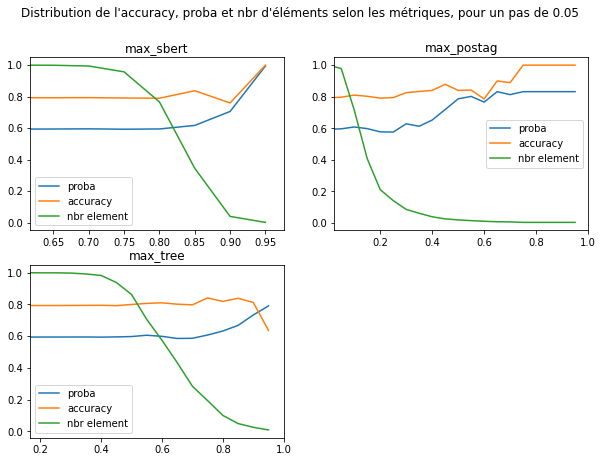

In [30]:
plt.figure(figsize=(10,7))
plt.suptitle("Distribution de l'accuracy, proba et nbr d'éléments selon les métriques, pour un pas de 0.05")
for metric,k in zip(['max_sbert','max_postag','max_tree'],range(1,4)):
    plt.subplot(2,2,k)
    plt.plot(list(dico_sup_005[metric].keys()),
             [dico_sup_005[metric][i].mean()['proba'] for i in list(dico_sup_005[metric].keys())],label='proba')
    plt.plot(list(dico_sup_005[metric].keys()),
             [dico_sup_005[metric][i].mean()['is_identical'] for i in list(dico_sup_005[metric].keys())],label='accuracy')
    plt.plot(list(dico_sup_005[metric].keys()),
             [len(dico_sup_005[metric][i])/len(df_labels) for i in list(dico_sup_005[metric].keys())],label='nbr element')
    plt.xlim([df_labels.min()[metric],df_labels.max()[metric]])
    plt.legend()
    plt.title(metric)

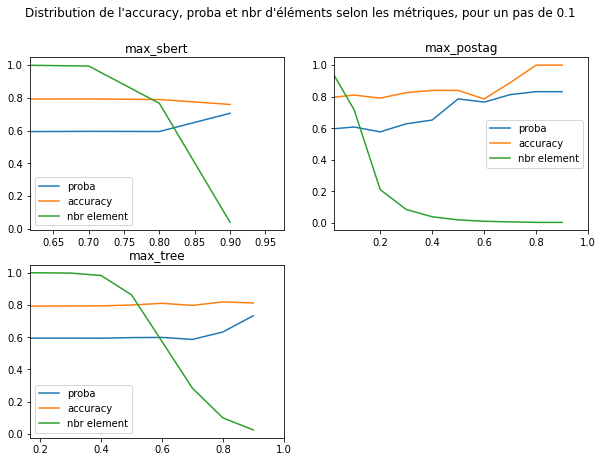

In [31]:
plt.figure(figsize=(10,7))
plt.suptitle("Distribution de l'accuracy, proba et nbr d'éléments selon les métriques, pour un pas de 0.1")
for metric,k in zip(['max_sbert','max_postag','max_tree'],range(1,4)):
    plt.subplot(2,2,k)
    plt.plot(list(dico_sup_01[metric].keys()),
             [dico_sup_01[metric][i].mean()['proba'] for i in list(dico_sup_01[metric].keys())],label='proba')
    plt.plot(list(dico_sup_01[metric].keys()),
             [dico_sup_01[metric][i].mean()['is_identical'] for i in list(dico_sup_01[metric].keys())],label='accuracy')
    plt.plot(list(dico_sup_01[metric].keys()),
             [len(dico_sup_01[metric][i])/len(df_labels) for i in list(dico_sup_01[metric].keys())],label='nbr element')
    plt.legend()
    plt.xlim([df_labels.min()[metric],df_labels.max()[metric]])
    plt.title(metric)

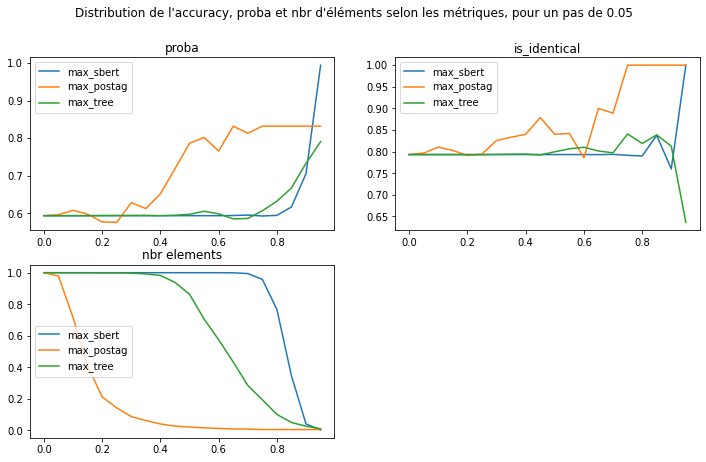

In [32]:
plt.figure(figsize=(12,7))
plt.suptitle("Distribution de l'accuracy, proba et nbr d'éléments selon les métriques, pour un pas de 0.05")
for metric in ['max_sbert','max_postag','max_tree']:
    k=1
    plt.subplot(2,2,k)
    plt.title('proba')
    #plt.ylim([0,1])
    plt.plot(list(dico_sup_005[metric].keys()),
             [dico_sup_005[metric][i].mean()['proba'] for i in list(dico_sup_005[metric].keys())],label=metric)
    plt.legend()
    k+=1
    plt.subplot(2,2,k)
    plt.title('is_identical')
    #plt.ylim([0,1])
    plt.plot(list(dico_sup_005[metric].keys()),
             [dico_sup_005[metric][i].mean()['is_identical'] for i in list(dico_sup_005[metric].keys())],label=metric)
    plt.legend()
    k+=1
    plt.subplot(2,2,k)
    plt.title('nbr elements')
    #plt.ylim([0,1])
    plt.plot(list(dico_sup_005[metric].keys()),
             [len(dico_sup_005[metric][i])/len(df_labels) for i in list(dico_sup_005[metric].keys())],label=metric)
    plt.legend()

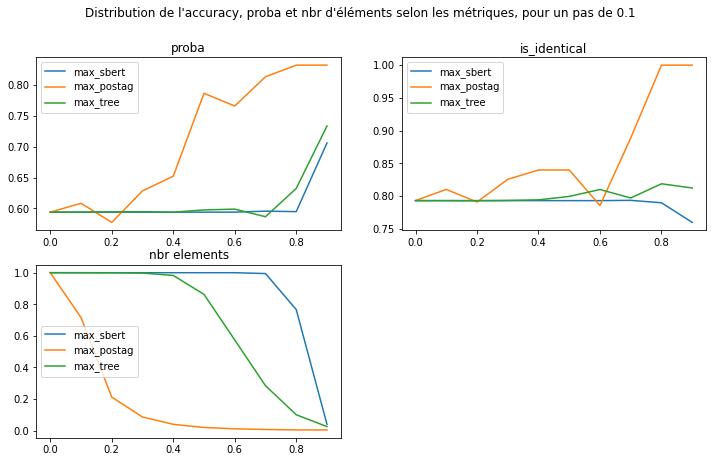

In [33]:
plt.figure(figsize=(12,7))
plt.suptitle("Distribution de l'accuracy, proba et nbr d'éléments selon les métriques, pour un pas de 0.1")
for metric in ['max_sbert','max_postag','max_tree']:
    k=1
    plt.subplot(2,2,k)
    plt.title('proba')
    #plt.ylim([0,1])
    plt.plot(list(dico_sup_01[metric].keys()),
             [dico_sup_01[metric][i].mean()['proba'] for i in list(dico_sup_01[metric].keys())],label=metric)
    plt.legend()
    k+=1
    plt.subplot(2,2,k)
    plt.title('is_identical')
    #plt.ylim([0,1])
    plt.plot(list(dico_sup_01[metric].keys()),
             [dico_sup_01[metric][i].mean()['is_identical'] for i in list(dico_sup_01[metric].keys())],label=metric)
    plt.legend()
    k+=1
    plt.subplot(2,2,k)
    plt.title('nbr elements')
    #plt.ylim([0,1])
    plt.plot(list(dico_sup_01[metric].keys()),
             [len(dico_sup_01[metric][i])/len(df_labels) for i in list(dico_sup_01[metric].keys())],label=metric)
    plt.legend()

In [34]:
df_labels['cent_red_max_sbert'] = (df_labels['max_sbert'] - df_labels.mean()['max_sbert'])/ df_labels.std()['max_sbert']
df_labels['cent_red_max_postag'] = (df_labels['max_postag'] - df_labels.mean()['max_postag'])/ df_labels.std()['max_postag']
df_labels['cent_red_max_tree'] = (df_labels['max_tree'] - df_labels.mean()['max_tree'])/ df_labels.std()['max_tree']

C:\Users\marti\AppData\Local\Temp\ipykernel_9596\886551607.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_labels['cent_red_max_sbert'] = (df_labels['max_sbert'] - df_labels.mean()['max_sbert'])/ df_labels.std()['max_sbert']
C:\Users\marti\AppData\Local\Temp\ipykernel_9596\886551607.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_labels['cent_red_max_postag'] = (df_labels['max_postag'] - df_labels.mean()['max_postag'])/ df_labels.std()['max_postag']
C:\Users\marti\AppData\Local\Temp\ipykernel_9596\886551607.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future versi

c:\users\marti\work\lattice-internship\venv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\users\marti\work\lattice-internship\venv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\users\marti\work\lattice-internship\venv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level func

<AxesSubplot:xlabel='cent_red_max_postag', ylabel='Density'>

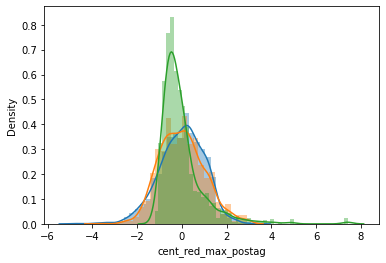

In [35]:
sns.distplot(df_labels['cent_red_max_sbert'])
sns.distplot(df_labels['cent_red_max_tree'])
sns.distplot(df_labels['cent_red_max_postag'])

In [36]:
step = 0.1
dico_sup_cr_01 = {}
decoupage = [round(-7.5 + 15*i*step,ndigits=2) for i in range(int(1/step)+1)]
for metric in tqdm.notebook.tqdm(['cent_red_max_sbert',
                                  'cent_red_max_postag','cent_red_max_tree'],
                                 desc='metric'):
    dico = {}
    for i in tqdm.notebook.tqdm(range(len(decoupage)-1),desc='decoupage'):
        temporaire = df_labels[df_labels[metric]>=decoupage[i]]
        dico[decoupage[i]] = pd.DataFrame(np.transpose([list(temporaire.index),temporaire[metric],temporaire['proba'],temporaire['is_identical']]),columns=['index',metric,'proba','is_identical'])
    dico_sup_cr_01[metric] = dico

metric:   0%|          | 0/3 [00:00<?, ?it/s]

decoupage:   0%|          | 0/10 [00:00<?, ?it/s]

decoupage:   0%|          | 0/10 [00:00<?, ?it/s]

decoupage:   0%|          | 0/10 [00:00<?, ?it/s]

In [37]:
step = 0.05
dico_sup_cr_005 = {}
decoupage = [round(-7.5 + 15*i*step,ndigits=2) for i in range(int(1/step)+1)]
for metric in tqdm.notebook.tqdm(['cent_red_max_sbert',
                                  'cent_red_max_postag','cent_red_max_tree'],
                                 desc='metric'):
    dico = {}
    for i in tqdm.notebook.tqdm(range(len(decoupage)-1),desc='decoupage'):
        temporaire = df_labels[df_labels[metric]>=decoupage[i]]
        dico[decoupage[i]] = pd.DataFrame(np.transpose([list(temporaire.index),temporaire[metric],temporaire['proba'],temporaire['is_identical']]),columns=['index',metric,'proba','is_identical'])
    dico_sup_cr_005[metric] = dico

metric:   0%|          | 0/3 [00:00<?, ?it/s]

decoupage:   0%|          | 0/20 [00:00<?, ?it/s]

decoupage:   0%|          | 0/20 [00:00<?, ?it/s]

decoupage:   0%|          | 0/20 [00:00<?, ?it/s]

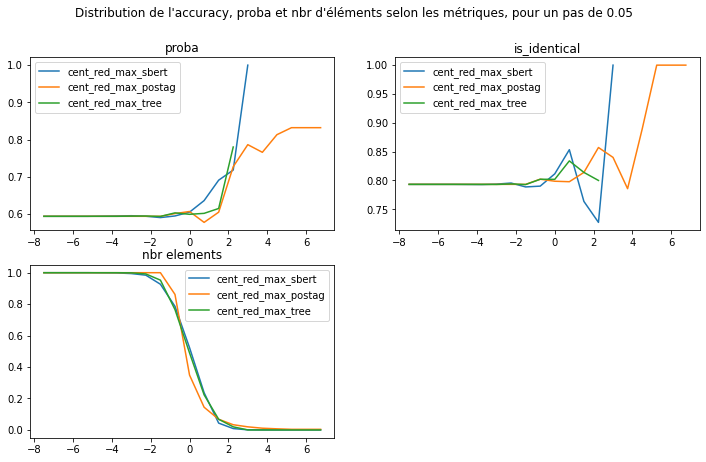

In [38]:
plt.figure(figsize=(12,7))
plt.suptitle("Distribution de l'accuracy, proba et nbr d'éléments selon les métriques, pour un pas de 0.05")
for metric in ['cent_red_max_sbert','cent_red_max_postag','cent_red_max_tree']:
    k=1
    plt.subplot(2,2,k)
    plt.title('proba')
    #plt.ylim([0,1])
    plt.plot(list(dico_sup_cr_005[metric].keys()),
             [dico_sup_cr_005[metric][i].mean()['proba'] for i in list(dico_sup_cr_005[metric].keys())],label=metric)
    plt.legend()
    k+=1
    plt.subplot(2,2,k)
    plt.title('is_identical')
    #plt.ylim([0,1])
    plt.plot(list(dico_sup_cr_005[metric].keys()),
             [dico_sup_cr_005[metric][i].mean()['is_identical'] for i in list(dico_sup_cr_005[metric].keys())],label=metric)
    plt.legend()
    k+=1
    plt.subplot(2,2,k)
    plt.title('nbr elements')
    #plt.ylim([0,1])
    plt.plot(list(dico_sup_cr_005[metric].keys()),
             [len(dico_sup_cr_005[metric][i])/len(df_labels) for i in list(dico_sup_cr_005[metric].keys())],label=metric)
    plt.legend()

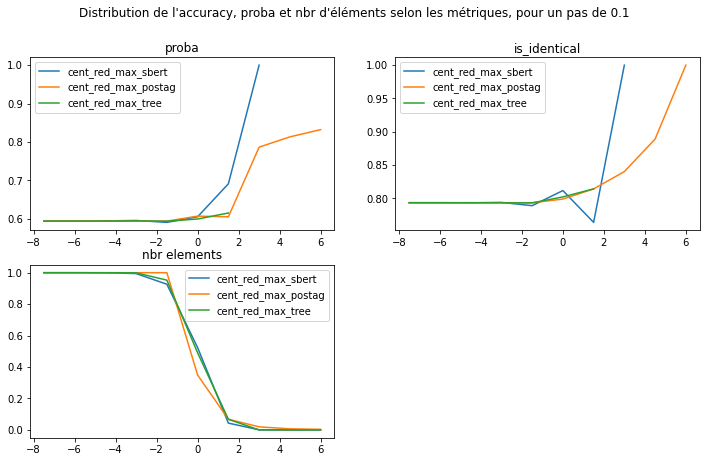

In [39]:
plt.figure(figsize=(12,7))
plt.suptitle("Distribution de l'accuracy, proba et nbr d'éléments selon les métriques, pour un pas de 0.1")
for metric in ['cent_red_max_sbert','cent_red_max_postag','cent_red_max_tree']:
    k=1
    plt.subplot(2,2,k)
    plt.title('proba')
    #plt.ylim([0,1])
    plt.plot(list(dico_sup_cr_01[metric].keys()),
             [dico_sup_cr_01[metric][i].mean()['proba'] for i in list(dico_sup_cr_01[metric].keys())],label=metric)
    plt.legend()
    k+=1
    plt.subplot(2,2,k)
    plt.title('is_identical')
    #plt.ylim([0,1])
    plt.plot(list(dico_sup_cr_01[metric].keys()),
             [dico_sup_cr_01[metric][i].mean()['is_identical'] for i in list(dico_sup_cr_01[metric].keys())],label=metric)
    plt.legend()
    k+=1
    plt.subplot(2,2,k)
    plt.title('nbr elements')
    #plt.ylim([0,1])
    plt.plot(list(dico_sup_cr_01[metric].keys()),
             [len(dico_sup_cr_01[metric][i])/len(df_labels) for i in list(dico_sup_cr_01[metric].keys())],label=metric)
    plt.legend()

In [107]:
def r_squared(dico,metric):
    return float(1-pd.DataFrame((p4([dico[metric][i].mean()[metric] for i in dico[metric]])-[dico[metric][i].mean()['proba'] for i in dico[metric]])**2).sum()/(pd.DataFrame([dico[metric][i].mean()['proba'] for i in dico[metric]])- pd.DataFrame([dico[metric][i].mean()['proba'] for i in dico[metric]]).mean()**2).sum())

In [256]:
def r_squared_prime(metric):
    moy = df_labels[metric].mean()
    a = ((p4(df_labels[metric])-df_labels['proba'])**2).sum()
    b = ((df_labels[metric]-moy)**2).sum()
    print(a,b)
    return float(1-a/b)

In [264]:
df_labels[metric]-df_labels[metric].mean(),df_labels[metric].mean()

(0       0.148753
 1       0.148753
 2      -0.167487
 3       0.023149
 4      -0.087359
           ...   
 1262   -0.093311
 1263   -0.036433
 1264    0.013832
 1265    0.010975
 1266    0.213080
 Name: max_tree, Length: 1267, dtype: float64,
 0.6290252631389857)

<Figure size 720x360 with 0 Axes>

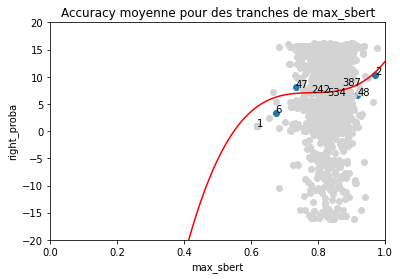

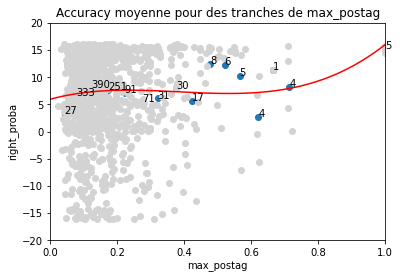

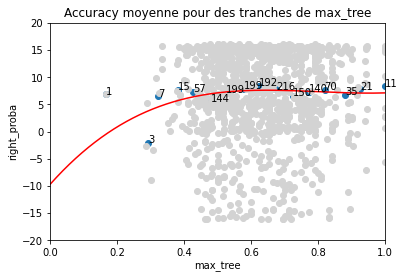

In [279]:
plt.figure(figsize=(10,5))
for metric,i in zip(['max_sbert','max_postag','max_tree'],range(1,4)):
    fig,ax=plt.subplots()
    plt.title(f"Accuracy moyenne pour des tranches de {metric}")
    plt.scatter([dico_005[metric][i].mean()[metric] for i in dico_005[metric]],[dico_005[metric][i].mean()['right_proba'] for i in dico_005[metric]])
    plt.xlabel(metric)
    plt.ylabel('right_proba',fontsize=10)
    plt.xlim([0,1])
    plt.ylim([-20,20])
    occ_per_range = [len(dico_005[metric][i]) for i in dico_005[metric]]
    for i, txt in enumerate(occ_per_range):
        ax.annotate(txt, ([dico_005[metric][i].mean()[metric] for i in dico_005[metric]][i], [dico_005[metric][i].mean()['right_proba'] for i in dico_005[metric]][i]))
    x = df_labels[metric]
    y = df_labels['right_proba']
    p4 = np.poly1d(np.polyfit(x, y,3))
    #p4prime = np.poly1d(np.polyfit([dico_005[metric][i].mean()[metric] for i in dico_005[metric]],
    #                               [dico_005[metric][i].mean()['proba'] for i in dico_005[metric]],3))
    #print(p4)
    #print(p4prime)
    xp = np.linspace(0, 1, 1000)
    #plt.plot(xp, p4prime(xp), c='r')
    #plt.text(x=0.05,y=0.8,s=f'R2 = {r_squared(dico_005,metric)}',color='red')
    #plt.text(x=0.05,y=0.7,s=f"R2' = {r_squared_prime(metric)}",color='red')
    #plt.text(x=0.05,y=0.9,s=f'{p4}',color='red')
    plt.scatter(df_labels[metric],df_labels['right_proba'],color='lightgrey')
    plt.plot(xp, p4(xp), c='r')
    plt.show()

252.593684845043 2.55924695603827


<Figure size 720x360 with 0 Axes>

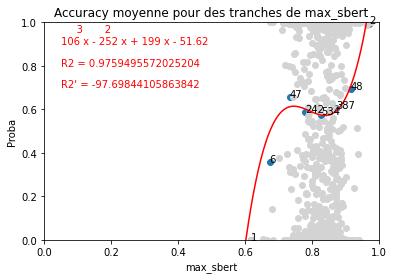

253.97816825219135 16.193059367981817


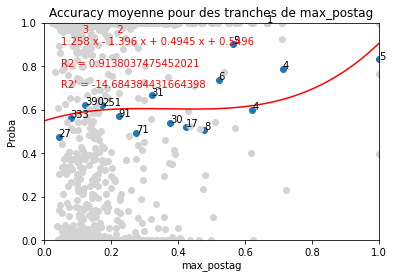

253.5953874988659 20.585290192789813


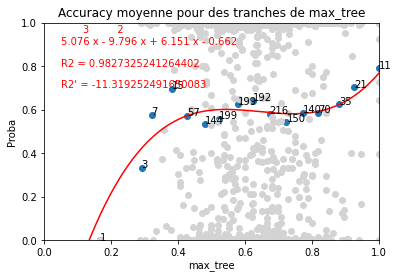

In [258]:
plt.figure(figsize=(10,5))
for metric,i in zip(['max_sbert','max_postag','max_tree'],range(1,4)):
    fig,ax=plt.subplots()
    plt.title(f"Accuracy moyenne pour des tranches de {metric}")
    plt.scatter([dico_005[metric][i].mean()[metric] for i in dico_005[metric]],[dico_005[metric][i].mean()['proba'] for i in dico_005[metric]])
    plt.xlabel(metric)
    plt.ylabel('Proba',fontsize=10)
    plt.xlim([0,1])
    plt.ylim([0,1])
    occ_per_range = [len(dico_005[metric][i]) for i in dico_005[metric]]
    for i, txt in enumerate(occ_per_range):
        ax.annotate(txt, ([dico_005[metric][i].mean()[metric] for i in dico_005[metric]][i], [dico_005[metric][i].mean()['proba'] for i in dico_005[metric]][i]))
    x = df_labels[metric]
    y = df_labels['proba']
    p4 = np.poly1d(np.polyfit(x, y,3))
    #p4prime = np.poly1d(np.polyfit([dico_005[metric][i].mean()[metric] for i in dico_005[metric]],
    #                               [dico_005[metric][i].mean()['proba'] for i in dico_005[metric]],3))
    #print(p4)
    #print(p4prime)
    xp = np.linspace(0, 1, 1000)
    #plt.plot(xp, p4prime(xp), c='r')
    plt.text(x=0.05,y=0.8,s=f'R2 = {r_squared(dico_005,metric)}',color='red')
    plt.text(x=0.05,y=0.7,s=f"R2' = {r_squared_prime(metric)}",color='red')
    plt.text(x=0.05,y=0.9,s=f'{p4}',color='red')
    plt.scatter(df_labels[metric],df_labels['proba'],color='lightgrey')
    plt.plot(xp, p4(xp), c='r')
    plt.show()

In [112]:
l=[]
for metric in ['max_sbert','max_postag','max_tree']:
    l1=[]
    for dico,step in zip([dico_005,dico_01],[0.05,0.1]):
        print(f"R2 pour {metric}, pas {step} : ",r_squared(dico,metric))
        l1.append(r_squared(dico,metric))
    l.append(l1)

R2 pour max_sbert, pas 0.05 :  0.7511274638083691
R2 pour max_sbert, pas 0.1 :  0.9163083515422855
R2 pour max_postag, pas 0.05 :  0.28813571949200834
R2 pour max_postag, pas 0.1 :  0.42628158396928983
R2 pour max_tree, pas 0.05 :  0.9827325241264402
R2 pour max_tree, pas 0.1 :  0.9803473962946727


c:\users\marti\work\lattice-internship\venv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='proba', ylabel='Density'>

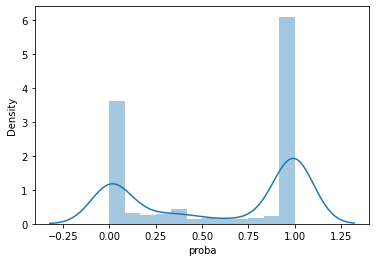

In [265]:
sns.distplot(df_labels['proba'],bins='auto')

c:\users\marti\work\lattice-internship\venv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\users\marti\work\lattice-internship\venv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\users\marti\work\lattice-internship\venv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level func

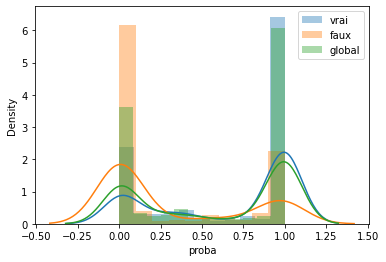

In [268]:
sns.distplot(df_labels[df_labels['is_identical']==1]['proba'],bins='auto',label='vrai')
sns.distplot(df_labels[df_labels['is_identical']==0]['proba'],bins='auto',label='faux')
sns.distplot(df_labels['proba'],bins='auto',label='global')
plt.legend()

In [114]:
pd.DataFrame(l,columns=[0.05,0.1],index=['max_sbert','max_postag','max_tree'])

,0.05,0.10
max_sbert,0.751127,0.916308
max_postag,0.288136,0.426282
max_tree,0.982733,0.980347


In [214]:
step = 0.1
dico_inf_01 = {}
decoupage = [round(i*step,ndigits=2) for i in range(int(1/step)+1)]
for metric in tqdm.notebook.tqdm(['max_sbert','max_postag','max_tree'],desc='metric'):
    dico = {}
    for i in tqdm.notebook.tqdm(range(len(decoupage)-1),desc='decoupage'):
        temporaire = df_labels[df_labels[metric]<=decoupage[i]]
        dico[decoupage[i]] = pd.DataFrame(np.transpose([list(temporaire.index),temporaire[metric],temporaire['proba'],temporaire['is_identical']]),columns=['index',metric,'proba','is_identical'])
    dico_inf_01[metric] = dico

metric:   0%|          | 0/3 [00:00<?, ?it/s]

decoupage:   0%|          | 0/10 [00:00<?, ?it/s]

decoupage:   0%|          | 0/10 [00:00<?, ?it/s]

decoupage:   0%|          | 0/10 [00:00<?, ?it/s]

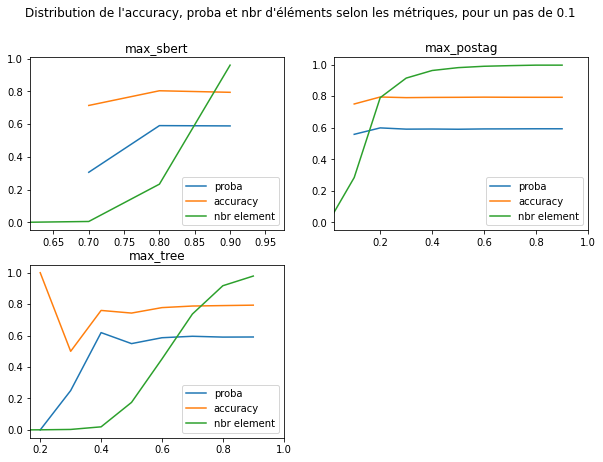

In [215]:
plt.figure(figsize=(10,7))
plt.suptitle("Distribution de l'accuracy, proba et nbr d'éléments selon les métriques, pour un pas de 0.1")
for metric,k in zip(['max_sbert','max_postag','max_tree'],range(1,4)):
    plt.subplot(2,2,k)
    plt.plot(list(dico_inf_01[metric].keys()),
             [dico_inf_01[metric][i].mean()['proba'] for i in list(dico_inf_01[metric].keys())],label='proba')
    plt.plot(list(dico_inf_01[metric].keys()),
             [dico_inf_01[metric][i].mean()['is_identical'] for i in list(dico_inf_01[metric].keys())],label='accuracy')
    plt.plot(list(dico_inf_01[metric].keys()),
             [len(dico_inf_01[metric][i])/len(df_labels) for i in list(dico_inf_01[metric].keys())],label='nbr element')
    plt.legend()
    plt.xlim([df_labels.min()[metric],df_labels.max()[metric]])
    plt.title(metric)

In [216]:
step = 0.05
dico_inf_005 = {}
decoupage = [round(i*step,ndigits=2) for i in range(int(1/step)+1)]
for metric in tqdm.notebook.tqdm(['max_sbert','max_postag','max_tree'],desc='metric'):
    dico = {}
    for i in tqdm.notebook.tqdm(range(len(decoupage)-1),desc='decoupage'):
        temporaire = df_labels[df_labels[metric]<=decoupage[i]]
        dico[decoupage[i]] = pd.DataFrame(np.transpose([list(temporaire.index),temporaire[metric],temporaire['proba'],temporaire['is_identical']]),columns=['index',metric,'proba','is_identical'])
    dico_inf_005[metric] = dico

metric:   0%|          | 0/3 [00:00<?, ?it/s]

decoupage:   0%|          | 0/20 [00:00<?, ?it/s]

decoupage:   0%|          | 0/20 [00:00<?, ?it/s]

decoupage:   0%|          | 0/20 [00:00<?, ?it/s]

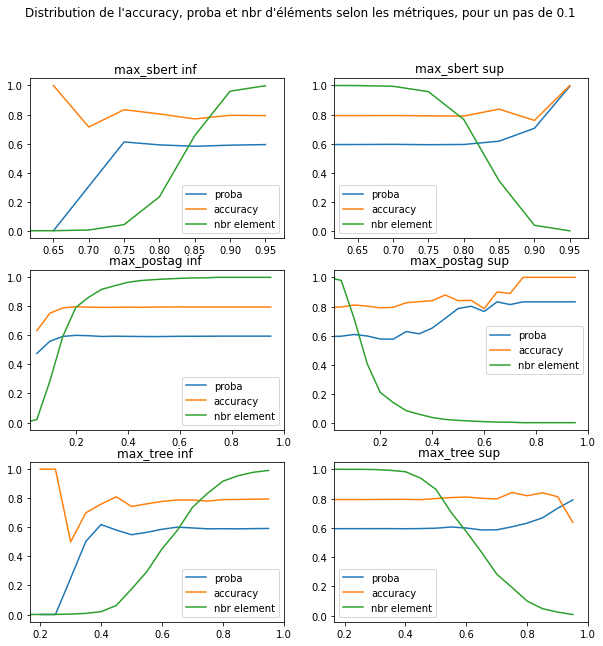

In [221]:
plt.figure(figsize=(10,10))
plt.suptitle("Distribution de l'accuracy, proba et nbr d'éléments selon les métriques, pour un pas de 0.1")
for metric,k in zip(['max_sbert','max_postag','max_tree'],range(1,4)):
    plt.subplot(3,2,2*k-1)
    plt.plot(list(dico_inf_005[metric].keys()),
             [dico_inf_005[metric][i].mean()['proba'] for i in list(dico_inf_005[metric].keys())],label='proba')
    plt.plot(list(dico_inf_005[metric].keys()),
             [dico_inf_005[metric][i].mean()['is_identical'] for i in list(dico_inf_005[metric].keys())],label='accuracy')
    plt.plot(list(dico_inf_005[metric].keys()),
             [len(dico_inf_005[metric][i])/len(df_labels) for i in list(dico_inf_005[metric].keys())],label='nbr element')
    plt.legend()
    plt.xlim([df_labels.min()[metric],df_labels.max()[metric]])
    plt.title(f"{metric} inf ")
for metric,k in zip(['max_sbert','max_postag','max_tree'],range(1,4)):
    plt.subplot(3,2,2*k)
    plt.plot(list(dico_sup_005[metric].keys()),
             [dico_sup_005[metric][i].mean()['proba'] for i in list(dico_sup_005[metric].keys())],label='proba')
    plt.plot(list(dico_inf_005[metric].keys()),
             [dico_sup_005[metric][i].mean()['is_identical'] for i in list(dico_sup_005[metric].keys())],label='accuracy')
    plt.plot(list(dico_sup_005[metric].keys()),
             [len(dico_sup_005[metric][i])/len(df_labels) for i in list(dico_sup_005[metric].keys())],label='nbr element')
    plt.legend()
    plt.xlim([df_labels.min()[metric],df_labels.max()[metric]])
    plt.title(f"{metric} sup ")

In [229]:
l=[]
for i in range(len(df_labels)):
    #print(data_xl.iloc[int(40398/2)+1+int(i)]['sentence'])
    #print(data_xl.iloc[int(40398/2)+1+int(i)]['option1'],'|',
    #      data_xl.iloc[int(40398/2)+1+int(i)]['option2'])
    #print(' ')
    if not data_test.iloc[i]['option1'].islower():
        if not data_test.iloc[i]['option2'].islower():
            l.append(i)

In [232]:
l2=[]
for i in range(len(df_labels)):
    if i in l:
        l2.append(1)
    else:
        l2.append(0)
df_labels['is_name']=l2

c:\users\marti\work\lattice-internship\venv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\users\marti\work\lattice-internship\venv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='proba', ylabel='Density'>

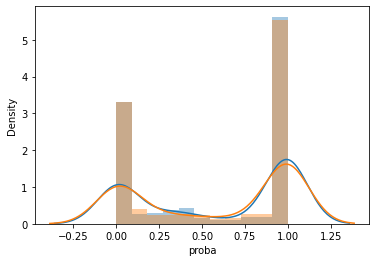

In [242]:
sns.distplot(df_labels[df_labels['is_name']==1]['proba'],bins='auto')
sns.distplot(df_labels[df_labels['is_name']==0]['proba'],bins='auto')

c:\users\marti\work\lattice-internship\venv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\users\marti\work\lattice-internship\venv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='right_proba', ylabel='Density'>

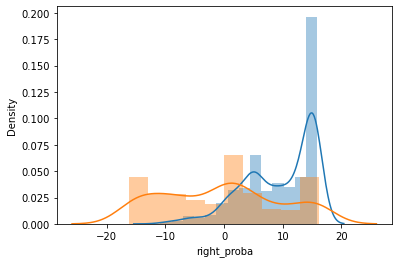

In [272]:
sns.distplot(df_labels[df_labels['is_identical']==1]['right_proba'],bins='auto')
sns.distplot(df_labels[df_labels['is_identical']==0]['right_proba'],bins='auto')

c:\users\marti\work\lattice-internship\venv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='right_proba', ylabel='Density'>

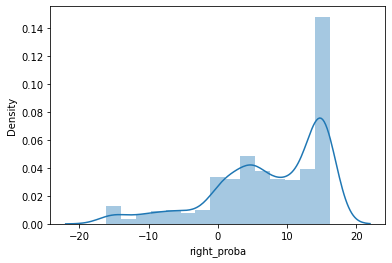

In [270]:
sns.distplot(df_labels['right_proba'])

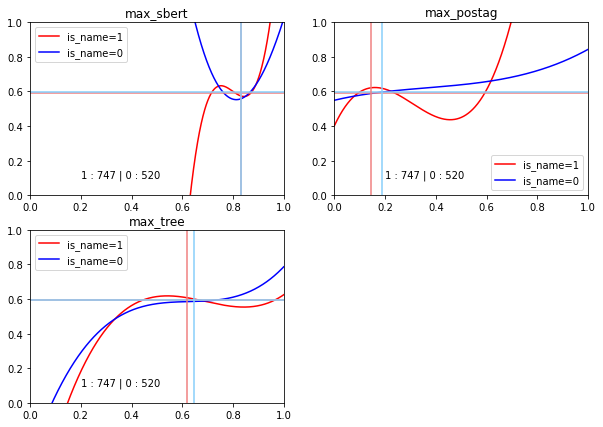

In [254]:
plt.figure(figsize=(10,7))
for metric,k in zip(['max_sbert','max_postag','max_tree'],range(1,4)):
    plt.subplot(2,2,k)
    x1 = df_labels[df_labels['is_name']==1][metric]
    y1 = df_labels[df_labels['is_name']==1]['proba']
    x2 = df_labels[df_labels['is_name']==0][metric]
    y2 = df_labels[df_labels['is_name']==0]['proba']
    p41 = np.poly1d(np.polyfit(x1, y1,3))
    p42 = np.poly1d(np.polyfit(x2, y2,3))
    xp = np.linspace(0, 1, 1000)
#plt.text(x=0.05,y=0.8,s=f'R2 = {r_squared(dico_005,metric)}',color='red')
#plt.text(x=0.05,y=0.7,s=f"R2' = {r_squared_prime(metric)}",color='red')
#plt.text(x=0.05,y=0.9,s=f'{p4}',color='red')
    plt.plot(xp, p41(xp),color='red',label='is_name=1')
    plt.plot(xp,p42(xp),color='blue',label='is_name=0')
    plt.legend()
    plt.xlim([0,1])
    plt.ylim([0,1])
    plt.text(x=0.2,y=0.1,s=f"1 : {len(df_labels[df_labels['is_name']==1])} | 0 : {len(df_labels[df_labels['is_name']==0])}")
    plt.axhline(df_labels[df_labels['is_name']==1]['proba'].mean(),color='lightcoral')
    plt.axhline(df_labels[df_labels['is_name']==0]['proba'].mean(),color='lightskyblue')
    plt.axvline(df_labels[df_labels['is_name']==1][metric].mean(),color='lightcoral')
    plt.axvline(df_labels[df_labels['is_name']==0][metric].mean(),color='lightskyblue')
    plt.title(metric)

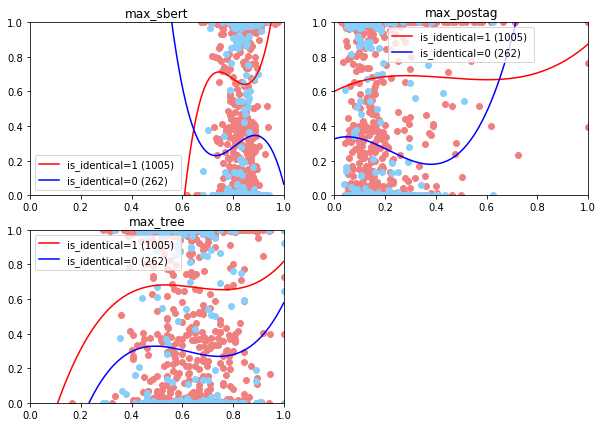

In [346]:
plt.figure(figsize=(10,7))
deg = 3
for metric,k in zip(['max_sbert','max_postag','max_tree'],range(1,4)):
    plt.subplot(2,2,k)
    x1 = df_labels[df_labels['is_identical']==1][metric]
    y1 = df_labels[df_labels['is_identical']==1]['proba']
    x2 = df_labels[df_labels['is_identical']==0][metric]
    y2 = df_labels[df_labels['is_identical']==0]['proba']
    p41 = np.poly1d(np.polyfit(x1, y1,deg))
    p42 = np.poly1d(np.polyfit(x2, y2,deg))
    xp = np.linspace(0, 1, 1000)
    plt.plot(xp, p41(xp),color='red',label=f"is_identical=1 ({len(df_labels[df_labels['is_identical']==1])}) ")
    plt.plot(xp,p42(xp),color='blue',label=f"is_identical=0 ({len(df_labels[df_labels['is_identical']==0])})")
    plt.legend()
    plt.xlim([0,1])
    plt.ylim([0,1])
    plt.scatter(x1,y1,color='lightcoral')
    plt.scatter(x2,y2,color='lightskyblue')
    plt.title(metric)

c:\users\marti\work\lattice-internship\venv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\users\marti\work\lattice-internship\venv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='wrong_proba', ylabel='Density'>

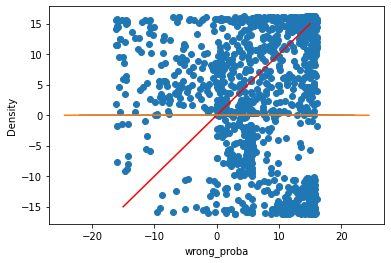

In [296]:
plt.scatter(df_labels['right_proba'],df_labels['wrong_proba'])
plt.plot([-15,15],[-15,15],color='red')

<Figure size 720x720 with 0 Axes>

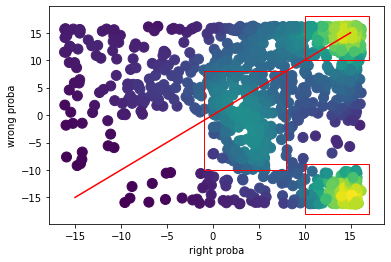

In [319]:
from scipy.stats import gaussian_kde
from matplotlib.patches import Rectangle
x,y = list(df_labels['right_proba']),list(df_labels['wrong_proba'])
xy = np.vstack([x,y])
z = gaussian_kde(xy)(xy)
plt.figure(figsize=(10,10))
fig, ax = plt.subplots()
ax.scatter(x, y, c=z, s=100)
ax.add_patch(Rectangle((10,10),7,8,edgecolor='r', facecolor="none"))
ax.add_patch(Rectangle((10,-18),7,9,edgecolor='r', facecolor="none"))
ax.add_patch(Rectangle((-1,-10),9,18,edgecolor='r', facecolor="none"))
plt.plot([-15,15],[-15,15],color='red')
plt.xlabel('right proba')
plt.ylabel('wrong proba')
plt.show()

C:\Users\marti\AppData\Local\Temp\ipykernel_9596\1110752279.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  box_1 = df_labels[df_labels['right_proba']>=10][df_labels['wrong_proba']>=10]
C:\Users\marti\AppData\Local\Temp\ipykernel_9596\1110752279.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  box_2 = df_labels[df_labels['right_proba']>=10][df_labels['wrong_proba']<=-9]
C:\Users\marti\AppData\Local\Temp\ipykernel_9596\1110752279.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  box_3 = df_labels[df_labels['right_proba']>=-1][df_labels['right_proba']<=8][df_labels['wrong_proba']>=-10][df_labels['wrong_proba']<=8]
c:\users\marti\work\lattice-internship\venv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexi

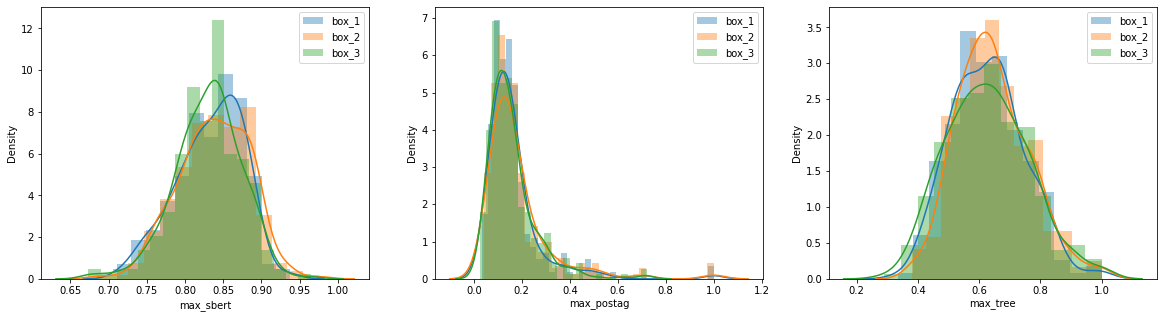

In [336]:
box_1 = df_labels[df_labels['right_proba']>=10][df_labels['wrong_proba']>=10]
box_2 = df_labels[df_labels['right_proba']>=10][df_labels['wrong_proba']<=-9]
box_3 = df_labels[df_labels['right_proba']>=-1][df_labels['right_proba']<=8][df_labels['wrong_proba']>=-10][df_labels['wrong_proba']<=8]
#i=1
plt.figure(figsize=(20,5))
for box,name in zip([box_1,box_2,box_3],['box_1','box_2','box_3']):
    i=1
    for metric in ['max_sbert','max_postag','max_tree']:
        plt.subplot(1,3,i)
        sns.distplot(box[metric],label=name)
        plt.legend()
        #plt.title(f"{metric} ||| {name}")
        #plt.text(x=box[metric].mean(),y=1,s=len(box),color='red')
        i+=1